# Homework 4: Modeling Bacterial Growth

### <p style="text-align: right;"> &#9989; Cesarine Graham.


# __CMSE  201 &ndash; Fall 2022__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />
     
## Goals

In this homework, you will use Numpy, SciPy and Matplotlib to model the bacterial growth. This should serve as a good assessment of what you understand at this point in the course. Make sure to use Slack and help room hours if you run into issues!

### By the end of the homework assignment you will have practiced:

1. Using `solve_ivp`
2. Using `curve_fit`
3. Using `matplotlib`
4. Interpreting model results
5. Computing data from model results
6. Learn a new built-in function of SciPy

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59 p.m. on Friday, Nov 18.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #4.  Submission instructions can be found at the end of the notebook.

## Grading

* Part 0: Academic integrity statement (1 point)
* Part 1: Preliminary (1 point)
   - Question 1 (1 point)

* Part 2: Find a numerical solution of the Monod type model (14 points)
   - Question 2 (7 points)
   - Question 3 (7 points)

* Part 3: Compute some quantites of interest (15 points)
   - Question 4 (6 points)
   - Question 5 (3 points)
   - Question 6 (6 points)

* Part 4: Fitting Experimental Data (19 points)
   - Question 7 (3 points)
   - Question 8 (6 points)
   - Question 9 (6 points)
   - Question 10 (4 points)

Total points possible: **50**
___

## Part 0: Academic integrity statement (1 point)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> *I, Cesarine Graham, commit to upholding the Spartan Code of Honor Academic Pledge, as well as holding the values true to myself for the rest of my academic career. I will uphold the core value of the US Navy being 'I will bear true faith and allegiance,' as the US Navy was the reason I was able to recieve a collegiate education and any further opportunites.'I commit to submitting my work, only my work, and nothing else. All work that is not mine shall be properly clearly and visibly cited to the audience.*

## Context

Antimicrobial resistance is among the 10 top threats that humans are facing, according to the [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/antimicrobial-resistance). As a young scientist, you wish to investigate the bacterial resistance to antimicrobials using _Vibrio cholerae_ as a model microorganism. This pathogen predominantly lives in aquatic environments and is the causative agent of cholera, a virulent disease that still affects millions of people, according to the World Health Organization. 

In order to deepen your knowledge in this field, you now want to initiate yourself to the modeling of bacterial growth based on ordinary differential equations (ODEs). As a first step, you will focus on the modeling of bacterial growth in a liquid environment, where aquatic bacteria such as _Vibrio cholerae_ can be found. More precisely, you are interested in a Monod kinetics growth model given by 

\begin{equation*}
    \begin{aligned}
        \frac{d C_M}{dt} =&\,\, \frac{\mu_1\,C_N}{K_s+C_N}\,C_M - k_r\,C_M\\
        \frac{d C_N}{dt} =&\,\, -\frac{\mu_2\,C_N}{K_s+C_N}\,C_M
    \end{aligned}
\end{equation*}

where $C_M$ is the concentration of bacteria per unit of volume, $C_N$ is the concentration of nutrients per unit per volume, $\mu_1$ is the maximum specific growth rate, $\mu_2>0$ considers the effect of the yield rate, $k_r>0$ is the first-order endogenous decay rate and $K_s$ is the concentration of nutrients where the specific growth rate, given by $\frac{\mu_1\,C_N}{K_s+C_N}$ has half its maximum value. 

Your goal is now to understand this model!

## Part 1: Preliminary (1 point)

**Question 1**: Make sure you set up your notebook to import the modules that you will need in this homework (numpy, matplotlib, pandas, solve_ivp, and curve_fit). 

In [1]:
# Put your code here
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
import math
import pandas as pd
import seaborn as sns

## Part 2: Find a numerical solution of the Monod type model (14 points)

As a first step, you want to find an approximation of the solution of the presented Monod type model for a given initial condition, that is the initial concentration of bacteria and nutrients. 

**Question 2.1**: Create a derivative function that computes the derivatives of $C_M$ and $C_N$ from the equations above (to be used in solve_ivp) with the following inputs/outputs:

Inputs:
1. time
2. a list containing the "current" values of $C_M$ and $C_N$
3. any other constants you need to compute the derivatives

Outputs:
1. derivative of $C_M$ 
2. derivative of $C_N$

In [2]:
# put your code here

def derivs(t,curr_vals,Ks, kr, u1, u2):
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    Cm = curr_vals[0]
    Cn = curr_vals[1]
    
    # Right-hand side of odes, which are used to computer the derivative
    dCmdt = ((u1*Cn)/(Ks + Cn)) * Cm - (kr * Cm) 
    dCndt = - ((u2*Cn)/(Ks + Cn))*Cm
    
    return dCmdt, dCndt

**Question 2.2:** Create a function named `computeApproxMonodModel` that calls your derivative function and uses `solve_ivp` to 
compute an approximation of $C_M$ and $C_N$. 

The **inputs** for your function are:

1. a list (or array) containing the constants of the model ($\mu_1$, $\mu_2$, $K_s$, and $k_r$)
2. a list (or array) containing the initial conditions of the model (initial values of $C_M$ and $C_N$)
3. an array of time values

The **outputs** are: 

1. a list (or array) that contains the approximation of $C_M$ (taken from the output of `solve_ivp`)
2. a list (or array) that contains the approximation of $C_N$ (taken from the output of `solve_ivp`)

Try to emphasize using unique (and descriptive) variable names to help keep track of things!

In [3]:
# Put your code here
def computeApproxMonodModel(time, constants, initial_values):

    Ks = constants[0]
    kr = constants[1]
    u1 = constants[2]
    u2 = constants[3]
    
    result = solve_ivp(derivs, (time[0],time[-1]),initial_values, t_eval=time, args=[Ks,kr,u1,u2])
    
    Cm = result.y[0,:]
    Cn = result.y[1,:]
    
    return Cm, Cn

**Question 3.1**: Using your `computeApproxMonodModel` function, compute the approximation of $C_M$ and $C_N$ for a time interval of $[0,100]$. You consider that the initial conditions of the model are a concentration of bacteria ($C_M$) and nutrients ($C_N$) of $0.03$ and $0.3$, respectively. The constants for this model are: $K_s = 0.3$, $\mu_1 = 0.05$, $\mu_2 = 0.3$ and $k_r =0.005$. Plot the approximations of $C_M$ and $C_N$ together on one plot (include all relevant labels).

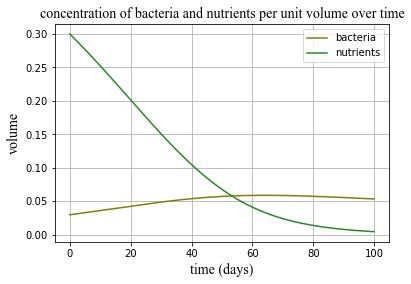

In [4]:
# Put your code here

time = np.linspace(0,101,1000)
constants = [0.3, 0.005, 0.05, 0.3]
initial_values = [0.03,0.3]

Cm, Cn = computeApproxMonodModel(time, constants, initial_values)

plt.plot(time, Cm, label = 'bacteria', color = 'olive')
plt.plot(time, Cn, label = 'nutrients', color = 'forestgreen')
plt.title('concentration of bacteria and nutrients per unit volume over time', font = 'Times New Roman', fontsize = 14)
plt.xlabel('time (days)', font = 'Times New Roman', fontsize = 14)
plt.ylabel('volume', font = "Times New Roman", fontsize = 14)
plt.legend()
plt.grid()

**Question 3.2:** Recall from the problem statement that $C_M$ is the concentration of bacteria per unit of volume and $C_N$ is the concentration of nutrients (food for the bacteria) per unit per volume. 

* According to your plot, how do $C_M$ and $C_N$ change over time? 

* Thinking a bit more broadly about how populations grow in relation to their available resources, does the way your solutions for $C_M$ and $C_N$ change in relation to each other make sense? Why or why not?

<font size=6 color="#009600">&#9998;</font> Cm (the concentration of bacteria) slowly increases over time then plateaus; Cn (the concentration of nutrients) drastically decreases over time. This trend occurs because the bacteria population is dependant upon the amount of resources (in our case, the nutrients) that are available. The larger the bacterial population, the faster the nutrients are depleted.

## Part 3: Compute some quantities of interest (15 points)

Now you want to compute some quantities of interest from the model results. Indeed, you wish to have an accurate approximation of the time when the concentration of nutrients is half of the initial concentration, and when the concentration of bacteria and nutrients are equal. In this part, you will consider that the initial concentration of bacteria and nutrients at $t=0$ are respectively $0.03$ and $0.3$, and the following parameters: $K_s = 0.3$, $\mu_1 = 0.05$, $\mu_2 = 0.3$ and $k_r = 0.005$.

To do so, you will use the function `root_scalar` from the library scipy.optimize (imported in the cell below).

This function computes the root $r$ of a given function $g(x)$, that is $g(r)=0$ (i.e. where the two functions intersect each other). 

The code below shows an example of finding this root for the function $g(x)=(x-1)^2$ with the x-axis (the function $y = 0$). The `root_scalar` function takes in the function you want to find a root of as well as two initial guesses for the root (one below where the root should be, and one above). In the example below, the inputs for root_scalar are the function `g`, and the initial guesses for the root of `x0=0.1` and `x1=0.3`.

In [5]:
from scipy.optimize import root_scalar

r = 0.9999999792406621


Text(0.5, 1.0, 'Intersection between g(x) and y=0')

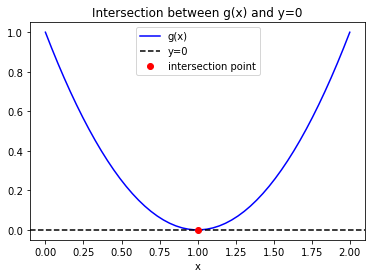

In [6]:
# EXAMPLE TAKEN FROM DAY 19 ICA

def g(x):
    return (x-1)**2.0

sol = root_scalar(g,x0=0.1,x1=0.3)

print('r =',sol.root)


x = np.linspace(0,2)
plt.plot(x,g(x),'-b',label='g(x)')
plt.axhline(0,ls='--',color='k',label='y=0')
plt.plot(sol.root,g(sol.root),'ro',label='intersection point')
plt.legend()
plt.xlabel('x')
plt.title('Intersection between g(x) and y=0')

### Intersection Between Two Curves with `root_scalar`

We can also use this strategy to compute the intersection between two curves. For example, the intersection between the curve $g(x)$ and the curve $y=0.5$ as shown in the cell below.

Text(0.5, 1.0, 'Intersection between g(x) and y=0.5')

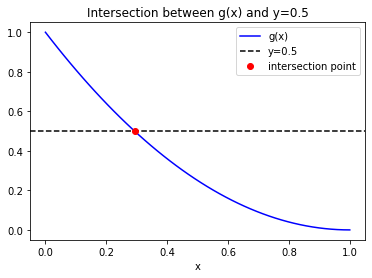

In [7]:
# EXAMPLE TAKEN FROM DAY 19 ICA

def h(x):
    # sets up a value to use for the curve y = 0.5
    y_target = 0.5
    # computes the difference between y = 0.5 and the function g(x) (for every value of x)
    curve_difference = g(x)-y_target  
    return curve_difference

sol = root_scalar(h,x0=0.1,x1=0.3) # finds the intersection of g(x) and y(x) = 0.5

x = np.linspace(0,1)
plt.plot(x,g(x),'-b',label='g(x)')
plt.axhline(0.5,ls ='--',color='k',label='y=0.5')
plt.plot(sol.root,g(sol.root),'ro',label='intersection point')
plt.legend()
plt.xlabel('x')
plt.title('Intersection between g(x) and y=0.5')

**Question 4**: Complete in the cell below the function called `CN_half` for which there is a root that corresponds to the time when the concentration of nutrients is half of the initial concentration. The **input** is a given time and the **output** is the value of $C_N(t) - C_N(0)/2$. You **must use** the function `computeApproxMonodModel` that you created in Question 2.

**Hints**: 
* You could use the graph of Question 3 to verify your results.

In [8]:
# Complete this function

def CN_half(t):
    # constants and initial conditions for the MonodModel function
    y0 = [0.03, 0.3]
    param = [0.3, 0.005, 0.05, 0.3]
    
    # set up the time interval
    time_grid = np.linspace(0,t,2) # you must use linspace otherwise there will be an error 
    
    # compute approximation of CM and CN
    CM,CN = computeApproxMonodModel(time_grid,param,y0) 
    
    # print out CN (for debugging)
    print(CN)
    
    # Compute the difference between the final value of CN and half the initial value of CN
    difference = (CN[-1])-(CN[0]/2)
    
    return difference # return the difference you computed

**Question 5**: Using the functions `root_scalar` and `CN_half`, find an approximation of the time when the concentration of nutrients is half of the initial concentration. For your initial guess of the roots, use `x0=20` and `x1=40`. Print your results.

In [9]:
# Put your code here
half_concentration = root_scalar(CN_half, x0=20, x1=40)
print(half_concentration)
print(half_concentration.root)

[0.3        0.20151494]
[0.3        0.10487461]
[0.3        0.14753608]
[0.3        0.14991588]
[0.3        0.15000022]
[0.3  0.15]
      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 30.157371803779935
30.157371803779935


**Question 6**: Using a similar procedure as in Question 4 and 5, find an approximation of the time when the concentration of nutrients and bacteria are equal. For your initial guess of the roots, use `x0=50` and `x1=60` Print your results.

In [10]:
# Put your code here

def CNCM(t):
    y0 = [0.03, 0.3]
    param = [0.3, 0.005, 0.05, 0.3]
    time_grid = np.linspace(0,t,2)
    CM,CN = computeApproxMonodModel(time_grid,param,y0) 

    # calculate when the final value of CM is equal to the final value of CN
    solution = CM[-1]-CN[-1]
    
    return solution

In [11]:
# Put your code to use root_scalar here
solution = root_scalar(CNCM, x0=50,x1=60)
print(solution)
print(solution.root)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 53.255138641321714
53.255138641321714


## Part 4: Fitting experimental data (19 points)

In this part, you want to fit a model on the experimental data of bacteria growth. The bacterial growth is quantified by measuring the optical density at 600 nm (OD$_{600}$) during 24 hours. The experimental data are contained in the file _OD600.csv_. Your goal is now to seek an appropriate model to fit these data. 

**Hint**: It is always a good idea to take a look to the file before loading it. 

**Question 7**: Extract from the file the time and the corresponding data. So you should have two arrays: one for the time and one for OD. Make a `scatter` plot showing the OD$_{600}$ vs time. Your figure should contain a title, a $x$-axis label and a $y$-axis label.

Text(0.5, 1.0, 'OD600 vs Time')

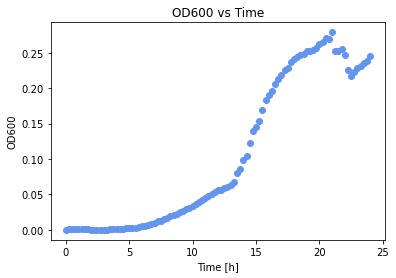

In [19]:
# Put your code here
data = pd.read_csv("OD600.csv", delimiter=',', skiprows=0)
time= data.loc[:, "Time [h]"]
OD= data.loc[:, "OD600"]

plt.scatter(time,OD, color = 'cornflowerblue')
plt.xlabel("Time [h]")
plt.ylabel("OD600")
plt.title("OD600 vs Time")

**Question 8.1**: As a first attempt, you want to fit a linear curve of the form $y = m\,t + b$. Using the function `curve_fit`, find the best fit parameters to the data. Then, plot the resulting curve and the experimental data in the same figure. Your figure should contain a title, a $x$-axis label, a $y$-axis label, and a legend. 

Make sure that each function that you create belongs to a cell of its own in order to ease the grading!

In [13]:
# Put your function here

def bacterial_growth(t,m,b):
    y = m*t + b
    return y

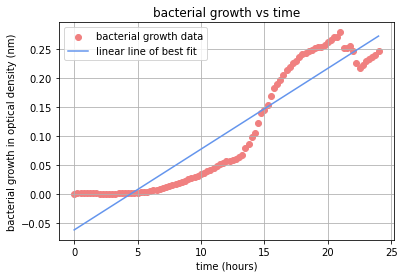

In [14]:
# Put your code here

linear_fit, just_ignore_this = curve_fit(bacterial_growth, time, OD)
m_c= linear_fit[0]
b_c= linear_fit[1]

y_fit = bacterial_growth(time, m_c, b_c)

plt.scatter(time, OD, label = "bacterial growth data", color = "lightcoral")
plt.xlabel("time (hours)")
plt.ylabel("bacterial growth in optical density (nm)")
plt.title("bacterial growth vs time")
plt.grid()

plt.plot(time, y_fit, color = "cornflowerblue", label = "linear line of best fit")
plt.legend()

**Question 8.2:**

Look at your plot of the linear model and the data. How well does the model describe the data? Would you trust this model to provide accurate estimates of future bacterial growth?

<font size=6 color="#009600">&#9998;</font> The model does a very poor job of describing the data. The data has more of an exponential shape and the model can't really be trusted to provide accurate estimates of future bacterial growth.

**Question 9.1:** Your next goal is to improve on the model from Question 8. Looking at the shape of the data (and doing some internet research and/or persuing of old math textbooks or CMSE 201 assignments), choose a model that you think will describe the data better than the linear model. Record your model in the cell below, and justify your choice!

<font size=6 color="#009600">&#9998;</font> I will be using the population model that was defined in the In-Class from Day 13:

$$P(t) = \frac{C}{1 + Ae^{-kt}}$$

I feel like this is a good model to work with since the raw data follows a roughly-exponential shape, but it also levels out towards the end of the set. The population model is able to show how a function rapidly increases, then levels out over time which is exactly what we need.

**Question 9.2:** As in Question 8, compute the best fit parameters for your new model and visualize your best fit with the data.

In [15]:
# Put your function here
from math import e
def population (t, C, Pinit, k):
    A=(C-Pinit)/(Pinit)
    P=(C)/(1+A*e**(-k*t))
    return P

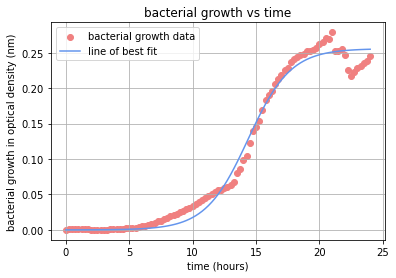

In [16]:
# Put your code here
parameters, curve = curve_fit(population, time, OD)

C_fit = parameters[0]
Pinit_fit = parameters[1]
k_fit = parameters[2]

growth_fit = population(time, C_fit, Pinit_fit, k_fit)

plt.scatter(time, OD, label = "bacterial growth data", color = "lightcoral")
plt.xlabel("time (hours)")
plt.ylabel("bacterial growth in optical density (nm)")
plt.title("bacterial growth vs time")
plt.grid()

plt.plot(time, growth_fit, color = "cornflowerblue", label = "line of best fit")
plt.legend()

**Question 10.1**: A simple approach that evaluates the quality of the fitting is to measure the mean squared error (MSE). That is, given the data $\{ (a_i, b_i) \} _{i = 1} ^N$, and the fitted model $f$, we shall calculate the  mean squared error
$$ MSE := \frac{1}{N}\sum_{i=1}^{N} (f(a_i) - b_i) ^2.$$

Beginning with the (optional) starter code below (one solution path from Day 14 In Class), write a function that takes the y values of the data and the y values of the best fit curve and returns the MSE (a single number). **Print your results**

**NOTE:** The starter code (and its structure) are optional guides. Feel free to start from scratch and/or make the code more compact.

In [17]:
def MSE(y1,y2):
    # computes difference between each data point and the best fit
    difference = []
    distance = y2-y1
    
    # square the differences and sum them
    distance = distance**2
    
    # divide them by the total number of data points
    average = np.mean(distance)
    
    return average

In [20]:
# calculate the MSE for the models here!
MSE(OD, growth_fit)

0.00014647696599556139

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.